# Predicting Algerian Forest Fires: Regression Analysis and Insights

## Introduction

The Algerian Forest Fires dataset consists of 244 rows with half of the rows dedicated to the Bejaia region of Algeria and the remaining dedicated to the Sidi Bel-abbes regions of Algeria. Please note, for the following project, a subset of the Algerian Forest Fires dataset was used that contains only the 122 rows of information related to the Bejaia region. Tasks associated with this dataset are classification and regression.

The dataset measures daily weather conditions from June 2012 to September 2012, namely, temperature, relative humidity, wind speed, rain, fine fuel MC, duff MC, drought code, initial spread index, buildup index, and fire weather index. An additional column contains the target classes (i.e. if a forest fire did or did not occur that day). The web address to locate the Algerian Forest Fires dataset is listed here: https://archive.ics.uci.edu/dataset/547/algerian+forest+fires+dataset.

## Objectives

To learn of the identified factors, which are the most related to each other and subsequently, are the most deterministic of a fire starting in the Bejaia region of Algeria.

## Data Analysis

**Data Preparation**

In [1]:
#import libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)

In [2]:
#Create Pandas Dataframe with Bejaia Region Dataset
df = pd.read_excel('Bejaia Region Dataset.xlsx')

#Rename abbreviated columns for better readability
df = df.rename(columns={"Rain ": "Rain", " RH" : "Relative Humidity", " Ws": "Wind Speed", "FFMC": "Fine Fuel MC", "DMC": "Duff MC",
                        "DC": "Drought Code", "ISI": "Initial Spread Index", "BUI": "Buildup Index", "FWI": "Fire Weather Index",
                        "Classes  ": "Classes"})

#Display first few rows and types of variables
print(df.head())
print('\n')
print(df.dtypes)

   day  month  year  Temperature  Relative Humidity  Wind Speed  Rain  \
0    1      6  2012           29                 57          18   0.0   
1    2      6  2012           29                 61          13   1.3   
2    3      6  2012           26                 82          22  13.1   
3    4      6  2012           25                 89          13   2.5   
4    5      6  2012           27                 77          16   0.0   

   Fine Fuel MC  Duff MC  Drought Code  Initial Spread Index  Buildup Index  \
0          65.7      3.4           7.6                   1.3            3.4   
1          64.4      4.1           7.6                   1.0            3.9   
2          47.1      2.5           7.1                   0.3            2.7   
3          28.6      1.3           6.9                   0.0            1.7   
4          64.8      3.0          14.2                   1.2            3.9   

   Fire Weather Index      Classes  
0                 0.5  not fire     
1           

**Data Pre-Processing**

In [3]:
#Drop columns that will not be used to evaluate hypotheses
df = df.drop(['day', 'year'], axis=1)
df.head(5)

,month,Temperature,Relative Humidity,Wind Speed,Rain,Fine Fuel MC,Duff MC,Drought Code,Initial Spread Index,Buildup Index,Fire Weather Index,Classes
0,6,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,6,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire
2,6,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,6,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire
4,6,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire


Handling Missing Values

In [4]:
#No missing values
df.info()
print('\n')
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   month                 122 non-null    int64  
 1   Temperature           122 non-null    int64  
 2   Relative Humidity     122 non-null    int64  
 3   Wind Speed            122 non-null    int64  
 4   Rain                  122 non-null    float64
 5   Fine Fuel MC          122 non-null    float64
 6   Duff MC               122 non-null    float64
 7   Drought Code          122 non-null    float64
 8   Initial Spread Index  122 non-null    float64
 9   Buildup Index         122 non-null    float64
 10  Fire Weather Index    122 non-null    float64
 11  Classes               122 non-null    object 
dtypes: float64(7), int64(4), object(1)
memory usage: 11.6+ KB


month                   0
Temperature             0
Relative Humidity       0
Wind Speed              0
Rain        

Handling Duplicates

In [5]:
#No duplicate rows
duplicate_rows_df = df[df.duplicated()]
print("Number of duplicate rows: ", duplicate_rows_df.shape)

Number of duplicate rows:  (0, 12)


Encoding Nominal Categorical Variables

In [6]:
df['Classes'].value_counts()

,count
Classes,
not fire,60
fire,53
fire,4
fire,2
not fire,2
not fire,1


In [7]:
#Adjust Classes column entries to unify 'fire' v. 'not fire' for one-hot-encoding below.
for index in range(122):
  if df['Classes'][index].startswith('f'):
    df.loc[index, 'Classes'] = 'fire'
  else:
    df.loc[index, 'Classes'] = 'not fire'

In [8]:
df['Classes'].value_counts()

,count
Classes,
not fire,63
fire,59


In [9]:
#Perform one hot encoding
df = pd.get_dummies(df, dtype=int)
df.head(10)

,month,Temperature,Relative Humidity,Wind Speed,Rain,Fine Fuel MC,Duff MC,Drought Code,Initial Spread Index,Buildup Index,Fire Weather Index,Classes_fire,Classes_not fire
0,6,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,1
1,6,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,1
2,6,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,1
3,6,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,1
4,6,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,1
5,6,31,67,14,0.0,82.6,5.8,22.2,3.1,7.0,2.5,1,0
6,6,33,54,13,0.0,88.2,9.9,30.5,6.4,10.9,7.2,1,0
7,6,30,73,15,0.0,86.6,12.1,38.3,5.6,13.5,7.1,1,0
8,6,25,88,13,0.2,52.9,7.9,38.8,0.4,10.5,0.3,0,1
9,6,28,79,12,0.0,73.2,9.5,46.3,1.3,12.6,0.9,0,1


In [10]:
#Rename new columns generated from one hot encoding
df = df.rename(columns = {'Classes_fire': 'Fire', 'Classes_not fire': 'Not_Fire'})
df.head()

,month,Temperature,Relative Humidity,Wind Speed,Rain,Fine Fuel MC,Duff MC,Drought Code,Initial Spread Index,Buildup Index,Fire Weather Index,Fire,Not_Fire
0,6,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,1
1,6,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,1
2,6,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,1
3,6,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,1
4,6,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,1


**Exploratory Data Analysis (EDA)**

Descriptive Statistics

In [11]:
df.shape

(122, 13)

In [12]:
#Summary statistics
df.describe()

,month,Temperature,Relative Humidity,Wind Speed,Rain,Fine Fuel MC,Duff MC,Drought Code,Initial Spread Index,Buildup Index,Fire Weather Index,Fire,Not_Fire
count,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000
mean,7.500000,31.180328,67.975410,16.000000,0.842623,74.672951,12.314754,53.160656,3.655738,15.426230,5.577869,0.483607,0.516393
std,1.115259,3.320401,11.154411,2.848807,2.409208,15.558713,11.274360,51.778265,3.021768,14.474302,6.343051,0.501792,0.501792
min,6.000000,22.000000,45.000000,11.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000,0.000000
25%,7.000000,29.000000,60.000000,14.000000,0.000000,65.925000,3.725000,10.050000,1.125000,5.100000,0.500000,0.000000,0.000000
50%,7.500000,31.000000,68.000000,16.000000,0.000000,80.900000,9.450000,35.550000,2.650000,11.200000,3.000000,0.000000,1.000000
75%,8.000000,34.000000,77.750000,18.000000,0.500000,86.775000,16.300000,79.025000,5.600000,21.675000,8.700000,1.000000,1.000000
max,9.000000,37.000000,89.000000,26.000000,16.800000,90.300000,54.200000,220.400000,12.500000,67.400000,30.200000,1.000000,1.000000


Display frequency of categorical variable

Text(0.5, 0, 'Fire(1) v. Not Fire(0)')

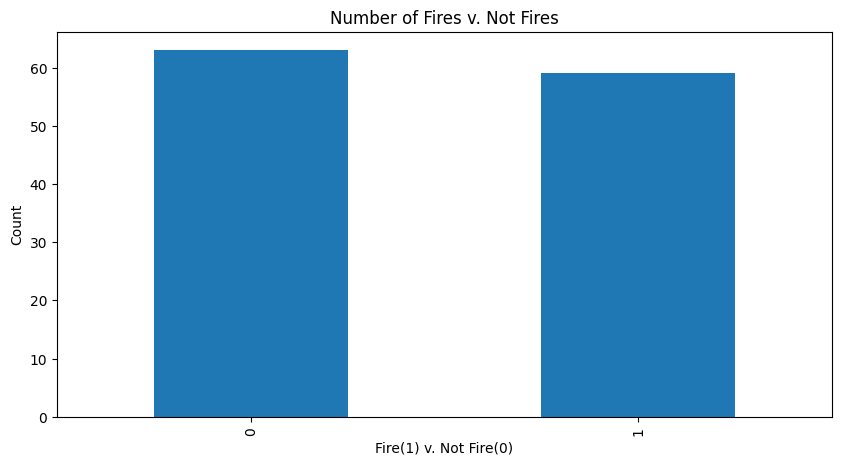

In [13]:
#Frequency of categorical variable
df.Fire.value_counts().nlargest(40).plot(kind='bar',figsize=(10,5))
plt.title('Number of Fires v. Not Fires')
plt.ylabel('Count')
plt.xlabel('Fire(1) v. Not Fire(0)')

Display histograms of numerical variables

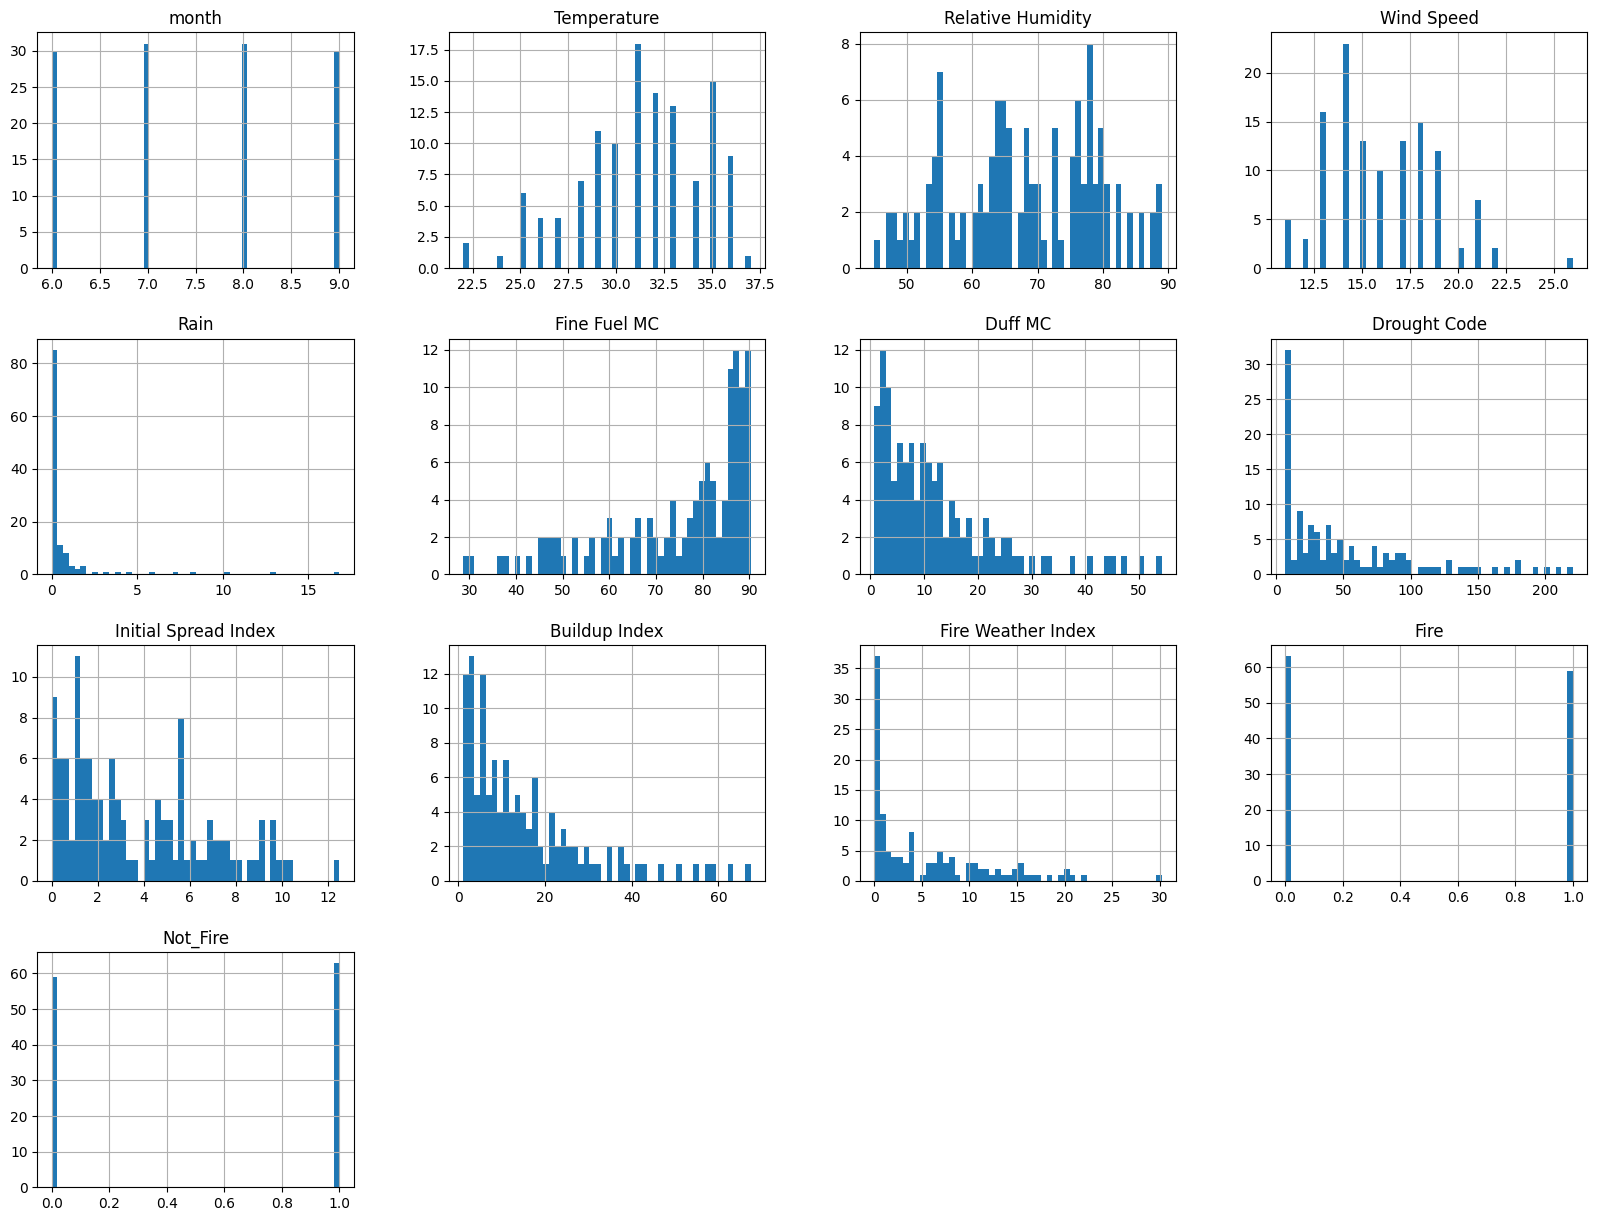

In [14]:
#Histograms to better understand numerical variables distributions
df.hist(bins=50, figsize=(20,15))
plt.show()

Check for outliers in quantitative variables

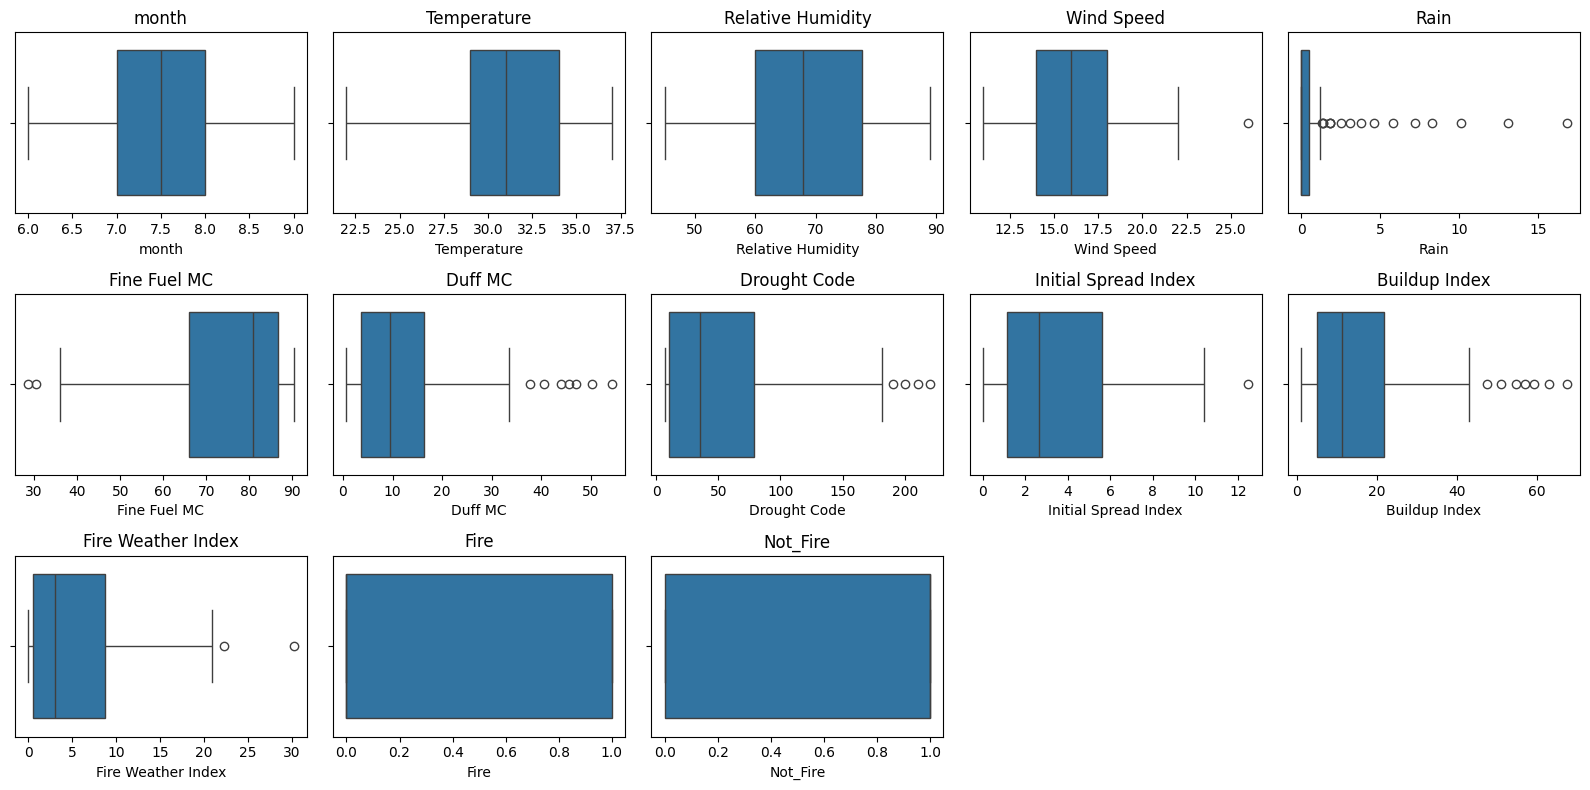

In [15]:
# Visualize outliers (using box plots for each feature)
plt.figure(figsize=(16, 8))
for i, column in enumerate(df.columns):
    plt.subplot(3, 5, i + 1)
    sns.boxplot(x=df[column])
    plt.title(column)
plt.tight_layout()
plt.show()

In [16]:
#Removing outliers in Wind Speed
Q1 = df['Wind Speed'].quantile(0.25)
Q3 = df['Wind Speed'].quantile(0.75)
IQR = Q3 - Q1

df = df[~((df['Wind Speed'] < (Q1 - 1.5 * IQR)) | (df['Wind Speed'] > (Q3 + 1.5 * IQR)))]

#Removing outliers in Rain
Q1 = df['Rain'].quantile(0.25)
Q3 = df['Rain'].quantile(0.75)
IQR = Q3 - Q1

df = df[~((df['Rain'] < (Q1 - 1.5 * IQR)) | (df['Rain'] > (Q3 + 1.5 * IQR)))]

#Removing outliers in Fine Fuel MC
Q1 = df['Fine Fuel MC'].quantile(0.25)
Q3 = df['Fine Fuel MC'].quantile(0.75)
IQR = Q3 - Q1

df = df[~((df['Fine Fuel MC'] < (Q1 - 1.5 * IQR)) | (df['Fine Fuel MC'] > (Q3 + 1.5 * IQR)))]

#Removing outliers in Duff MC
Q1 = df['Duff MC'].quantile(0.25)
Q3 = df['Duff MC'].quantile(0.75)
IQR = Q3 - Q1

df = df[~((df['Duff MC'] < (Q1 - 1.5 * IQR)) | (df['Duff MC'] > (Q3 + 1.5 * IQR)))]

#Removing outliers in Drought Code
Q1 = df['Drought Code'].quantile(0.25)
Q3 = df['Drought Code'].quantile(0.75)
IQR = Q3 - Q1

df = df[~((df['Drought Code'] < (Q1 - 1.5 * IQR)) | (df['Drought Code'] > (Q3 + 1.5 * IQR)))]

#Removing outliers in Initial Spread Index
Q1 = df['Initial Spread Index'].quantile(0.25)
Q3 = df['Initial Spread Index'].quantile(0.75)
IQR = Q3 - Q1

df = df[~((df['Initial Spread Index'] < (Q1 - 1.5 * IQR)) | (df['Initial Spread Index'] > (Q3 + 1.5 * IQR)))]

#Removing outliers in Buildup Index
Q1 = df['Buildup Index'].quantile(0.25)
Q3 = df['Buildup Index'].quantile(0.75)
IQR = Q3 - Q1

df = df[~((df['Buildup Index'] < (Q1 - 1.5 * IQR)) | (df['Buildup Index'] > (Q3 + 1.5 * IQR)))]

#Removing outliers in Fire Weather Index
Q1 = df['Fire Weather Index'].quantile(0.25)
Q3 = df['Fire Weather Index'].quantile(0.75)
IQR = Q3 - Q1

df = df[~((df['Fire Weather Index'] < (Q1 - 1.5 * IQR)) | (df['Fire Weather Index'] > (Q3 + 1.5 * IQR)))]

df.shape

(93, 13)

Correlation Matrix

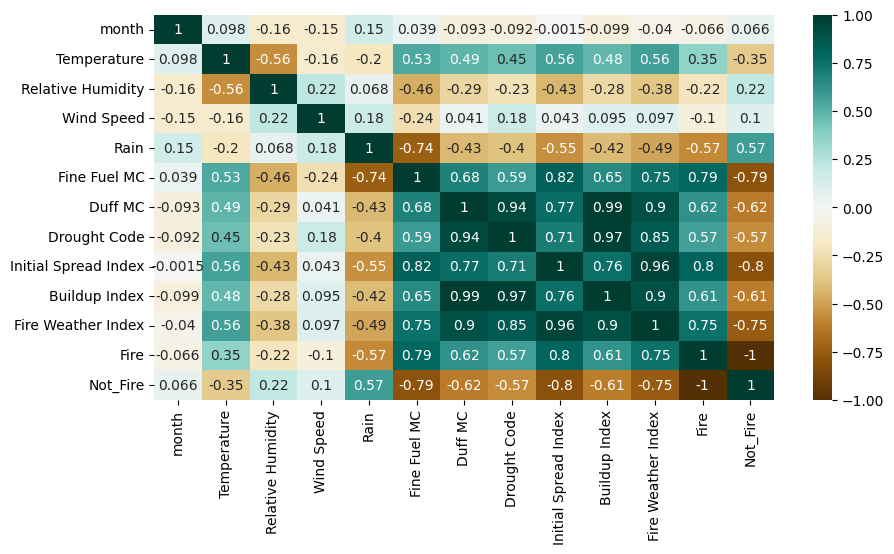

In [17]:
numeric_columns = df.select_dtypes(include=['float64','int64'])

plt.figure(figsize=(10,5))
correlation_matrix = numeric_columns.corr()
sns.heatmap(correlation_matrix, cmap="BrBG", annot=True)

plt.show()

Scatter Plots

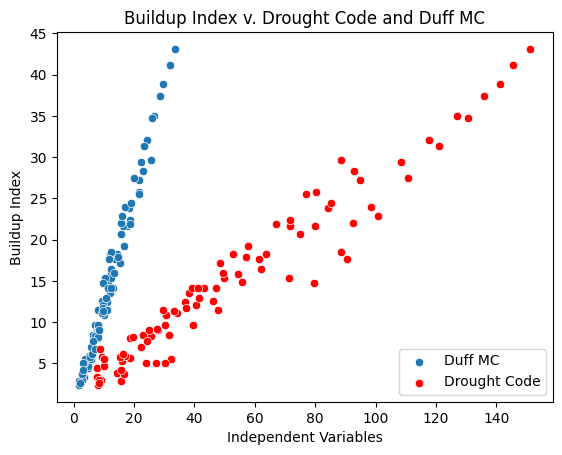

In [18]:
#Scatter Plots to visualize relationships between pairs of numerical variables

#Linear relationship between Duff MC and Buildup Index
#Linear relationship between Drought Code and Buildup Index
sns.scatterplot(x=df['Duff MC'], y=df['Buildup Index'], label='Duff MC')
sns.scatterplot(x=df['Drought Code'], y=df['Buildup Index'], color='red', label='Drought Code')
plt.xlabel('Independent Variables')
plt.title('Buildup Index v. Drought Code and Duff MC')
plt.legend()

<Axes: xlabel='Duff MC', ylabel='Drought Code'>

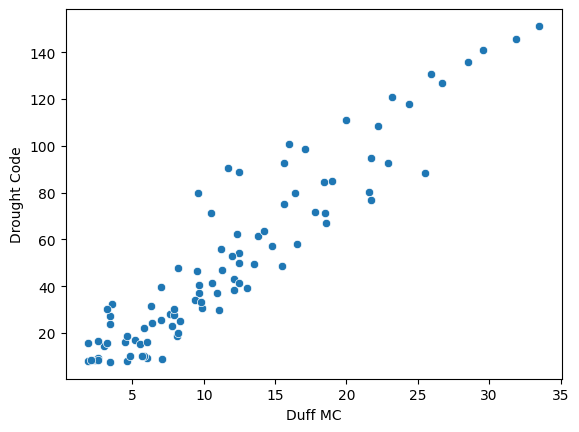

In [19]:
#Display relationship between Duff MC and Drought Code -- indicator of detected multicollinearity later
sns.scatterplot(x=df['Duff MC'], y=df['Drought Code'])

## Statistical Hypotheses

### Impact of Drought Code and Duff MC on Buildup Index


---



*   **Null Hypothesis (H0)**: Drought Code and Duff MC do not influence Buildup Index.
*   **Alternative Hypothesis (H1):** At least one of the variables (Drought Code or Duff MC) significantly influences Buildup Index.







In [20]:
#Import neccessary libraries for multiple linear regression analysis
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from statsmodels.stats.stattools import durbin_watson
import scipy.stats as stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

In [21]:
#Relevant feature selection
X_1 = df.drop(['month', 'Temperature', 'Relative Humidity', 'Wind Speed', 'Rain', 'Fine Fuel MC',
            'Initial Spread Index', 'Buildup Index', 'Fire Weather Index', 'Fire', 'Not_Fire'], axis=1) #independent variables
y_1 = df['Buildup Index'] #dependent variable

X_train, X_test, y_train, y_test = train_test_split(X_1, y_1, test_size=0.3, random_state=42) #30% of data goes into test set, the rest into training
lr = LinearRegression()


In [22]:
#Fit the model on training data
lr.fit(X_train, y_train) #adjusts internal parameters to data (i.e estimates coefficients of regression equation from input features X_train and known output y_train)

LinearRegression()

In [23]:
#Test the model
y_pred = lr.predict(X_test)
print('Predicted values are ', y_pred[1:5]) #First five values of predicted values

Predicted values are  [ 2.72163222  8.58170982 38.72508987  3.36247475]


In [24]:
#Calculate error metrics
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error: ', mse)

r2 = lr.score(X_test, y_test)
print('R-squared Score: ', r2)

#Determine equation of regression
#Find weights applied to each X variable
coefficients = lr.coef_
print('Coefficients of Duff MC and Drought Code, respectively: ', coefficients)

#Find intercept
intercept = lr.intercept_
print('Intercept: ', intercept)

Mean Squared Error:  0.46989548580289936
R-squared Score:  0.9950367702505694
Coefficients of Duff MC and Drought Code, respectively:  [0.82620494 0.10274192]
Intercept:  -0.22746059461582213


Checking assumptions for multiple linear regression model

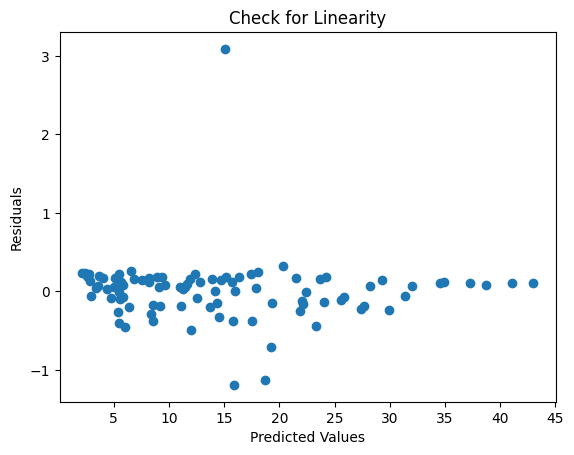

In [25]:
#First check linearity -- the relationship between predictors (Duff MC and Drought Code) and outcome variable should be linear

#Predicted values
y_pred = lr.predict(X_1)

#Residuals
residuals = y_1 - y_pred

plt.scatter(y_pred, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Check for Linearity')
plt.show()

In [26]:
#Checking for Independence -- The residuals (prediction errors) are independent of each other

durbinWatson = durbin_watson(residuals)
print('Durbin-Watson:', durbinWatson)
print('A value around 2 suggest no autocorrelation.')

Durbin-Watson: 1.5651331840027507
A value around 2 suggest no autocorrelation.


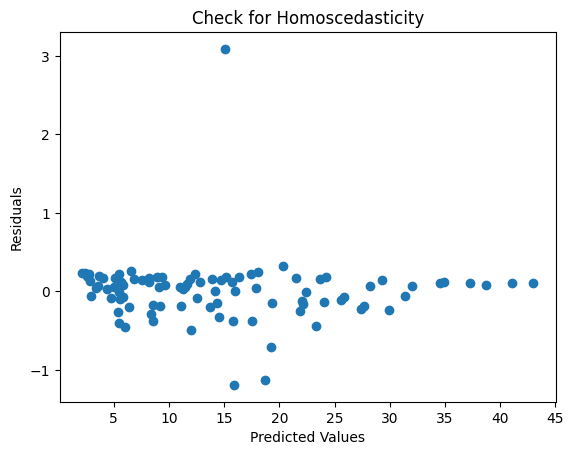

In [27]:
#Check Homoscedasticity -- The variance of residuals is constant across all levels of predictors

y_pred = lr.predict(X_1)
residuals = y_1 - y_pred

plt.scatter(y_pred, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Check for Homoscedasticity')
plt.show()

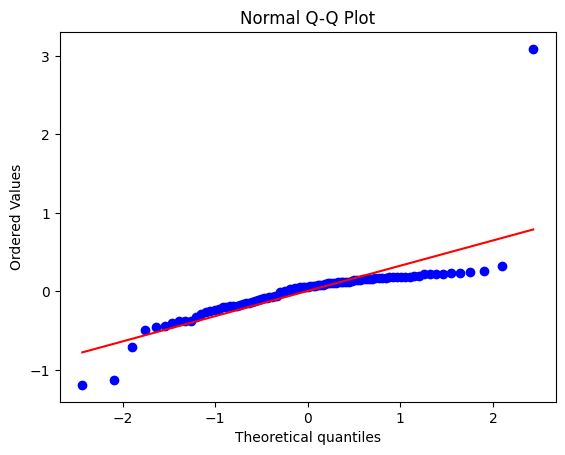

In [28]:
#Check Normality -- The residuals are normally distributed

stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Normal Q-Q Plot")
plt.show()

In [29]:
#Check Multicollinearity -- Predictors are not perfectly correlated with eachother

vif_data = pd.DataFrame()
vif_data["feature"] = X_1.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X_1.values, i)
                          for i in range(len(X_1.columns))]

print(vif_data)

        feature        VIF
0       Duff MC  22.630275
1  Drought Code  22.630275


The Variance Inflation Factor (VIF) is used to detect multicollinearity with the general guidelines that a VIF value greater than five implies high correlation. The data returns a VIF value for DMC and DC of 22.63. Thus, there is multicollinearity present in the data that violates the assumptions of the linear regression model. Apply Ridge Regression to accomodate assumption violation.

Apply Ridge Regression

In [30]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn import metrics
from sklearn.linear_model import RidgeCV

#Selected Ridge because it works well even when predictor variables are highly correlated while lasso
#arbitrarily selects any one variable among highly correlated ones and reduces others to zero.

# Defining list of alphas
alphas = np.logspace(-4, 4, 200)

# Create a ridge regressor object that performs cross-validation
ridge_cv = RidgeCV(alphas=alphas)

# Fit to training data
ridge_cv.fit(X_train,y_train)

# Get predictions for test set
y_pred_ridgecv=ridge_cv.predict(X_test)

r2_ridge = r2_score(y_test, y_pred_ridgecv)

#Get new weights
coefficients = ridge_cv.coef_

print('Best Alpha after Cross Validation :', ridge_cv.alpha_)
print('Ridge CV Model Mean Squared Error:', metrics.mean_squared_error(y_test,y_pred_ridgecv))
print(f"R-squared Score after Cross Validation with Lasso: {r2_ridge}")
print('Coefficients of Duff MC and Drought Code, respectively: ', coefficients)

Best Alpha after Cross Validation : 0.0001
Ridge CV Model Mean Squared Error: 0.46989510516018723
R-squared Score after Cross Validation with Lasso: 0.9950367742710745
Coefficients of Duff MC and Drought Code, respectively:  [0.82620471 0.10274188]


Interestingly enough, even though mutlicollinearity is present, the alpha value found for ridge regression with cross validation is only 0.0001. This is close to zero and means the ridge regression is almost identical to the multiple linear regression already performed. Perform lasso regularization next to see if the model can be improved with a different regularization technique (L1 regularization).

In [31]:
from sklearn.linear_model import LassoCV

lasso_cv = LassoCV(cv=5)

lasso_cv.fit(X_train, y_train)

print(f"Best Alpha after Cross Validation: {lasso_cv.alpha_}")

predictions = lasso_cv.predict(X_test)

mse = mean_squared_error(y_test, predictions)
r2_lasso = r2_score(y_test, predictions)

coefficients = lasso_cv.coef_

print(f"Mean Squared Error after Cross Validation: {mse}")
print(f"R-squared Score after Cross Validation with Lasso: {r2_lasso}")
print('Coefficients of Duff MC and Drought Code, respectively: ', coefficients)

Best Alpha after Cross Validation: 0.3657774035502959
Mean Squared Error after Cross Validation: 0.5548375259896001
R-squared Score after Cross Validation with Lasso: 0.9941395774203134
Coefficients of Duff MC and Drought Code, respectively:  [0.77766726 0.11195602]


### Predicting Forest Fires


---



*   **Null Hypothesis (H0):** Every weather condition captured in the Bejaia Region Dataset does not affect the likelihood of a forest fire.
*   **Alternative Hypothesis (H1):** Every weather condition captured in the Bejaia Region Dataset significantly affects the likelihood of a forest fire.





In [32]:
#Import additional necessary libraries for Logistic Regression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

In [33]:
X_2 = df.drop(columns={'month','Fire','Not_Fire'}, axis=1)
#pick column Fire or Not_Fire. Do not need to choose both because they display same data
#just make sure you know which class 1 and 0 correspond to for the column you choose.
y_2 = df['Fire']

X_train, X_test, y_train, y_test = train_test_split(X_2, y_2, test_size=0.3)

In [34]:
scaler = StandardScaler()

#Important to scale the data since the features of this dataset all have difference scales
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [35]:
#Train the Logistic Regression Model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [36]:
#Test model
predictions = model.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.71      1.00      0.83        12
           1       1.00      0.69      0.81        16

    accuracy                           0.82        28
   macro avg       0.85      0.84      0.82        28
weighted avg       0.87      0.82      0.82        28



In [37]:
#Calculate metrics
# Accuracy score -- how often our model makes correct predictions overall
accuracy = accuracy_score(y_test,predictions)
print("Accuracy:", accuracy)

# Precision score -- how many predicted positive instances are actually positive
precision = precision_score(y_test, predictions)
print("Precision:", precision)

# Recall score -- how many actual positive instances are correctly predicted as positive
recall = recall_score(y_test, predictions)
print("Recall:", recall)

# F1-score -- combines precision and recall into a single metric
f1score = f1_score(y_test, predictions)
print("F1-Score:", f1score)
print('\n')

coefficients_before_lasso = model.coef_
print("Coefficients: ", coefficients_before_lasso)


Accuracy: 0.8214285714285714
Precision: 1.0
Recall: 0.6875
F1-Score: 0.8148148148148148


Coefficients:  [[-0.31851657  0.18571084 -0.25133939 -0.61520166  1.23192835  0.21892999
   0.35073062  1.59490499  0.26751577  1.14603282]]


ROC AUC Score: 0.84375


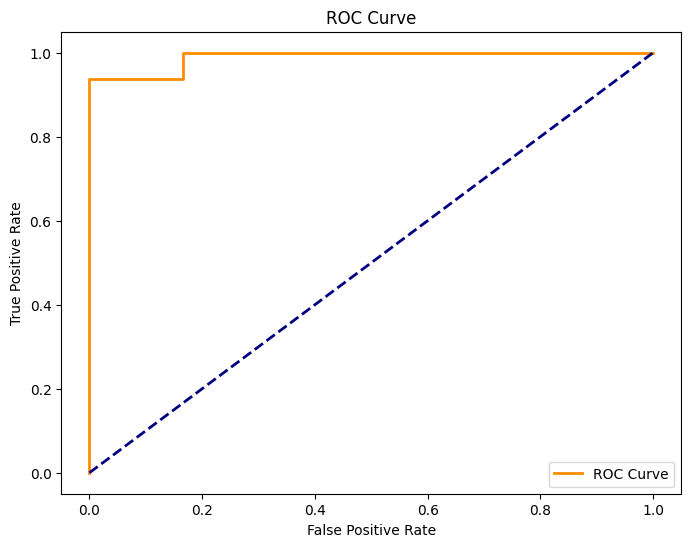

In [38]:
# Plot ROC Curve

# ROC AUC Score -- visualizes trade-offs between sensitivity (recall) and specificity (true negative rate)
roc_auc = roc_auc_score(y_test, predictions)
print("ROC AUC Score:", roc_auc)

y_proba = model.predict_proba(X_test)[:, 1]

fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC Curve')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

The ROC Curve is far away from the diagonal line which represents a random classifier, and close to the top-left corner (0,1). Therefore, the model can decently distinguish between positive and negative classes.

The AUC (area under the curve) is 0.947. This is fairly close to 1 where 1 is a perfect model.

May be able to improve this model by performing lasso regularization to extract only the most important weather conditions when determining the class Fire or Not_Fire.

Apply Lasso Regularization

In [39]:
from sklearn.linear_model import LogisticRegression, LassoCV, RidgeCV
from sklearn.feature_selection import SelectFromModel

In [40]:
#Apply feature selection using lasso regularization

X_before_lasso = df.drop(columns={'month','Fire','Not_Fire'}, axis=1)
#Once again, pick column Fire or Not_Fire. Do not need to choose both because they display same data
#just make sure you know which class 1 and 0 correspond to for the column you choose.
y_before_lasso = df['Fire']

X_train, X_test, y_train, y_test = train_test_split(X_before_lasso, y_before_lasso, test_size=0.3)

#Feature selection with Lasso Regularization
sel_lasso = SelectFromModel(LogisticRegression(C=1, penalty='l1', solver='liblinear'))
sel_lasso.fit(X_train, y_train)
selected_feat_lasso = X_train.columns[(sel_lasso.get_support())]


print('Features selected by lasso regularization: ', selected_feat_lasso)

Features selected by lasso regularization:  Index(['Temperature', 'Relative Humidity', 'Wind Speed', 'Fine Fuel MC',
       'Duff MC', 'Drought Code', 'Fire Weather Index'],
      dtype='object')


In [41]:
#Perform Logistic Regression again with only selected features from Lasso Regularization

X_lasso = df.drop(columns={'month', 'Rain', 'Initial Spread Index', 'Buildup Index', 'Fire','Not_Fire'}, axis=1)

y_lasso = df['Fire']

X_train, X_test, y_train, y_test = train_test_split(X_lasso, y_lasso, test_size=0.3)


In [42]:
scaler = StandardScaler()

#important since the features of this dataset all have difference scales
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [43]:
#Train model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [44]:
#Test model
predictions = model.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        11

    accuracy                           1.00        28
   macro avg       1.00      1.00      1.00        28
weighted avg       1.00      1.00      1.00        28



In [45]:
# Accuracy score -- how often our model makes correct predictions overall
accuracy = accuracy_score(y_test,predictions)
print("Accuracy:", accuracy)

# Precision score -- how many predicted positive instances are actually positive
precision = precision_score(y_test, predictions)
print("Precision:", precision)

# Recall score -- how many actual positive instances are correctly predicted as positive
recall = recall_score(y_test, predictions)
print("Recall:", recall)

# F1-score -- combines precision and recall into a single metric
f1score = f1_score(y_test, predictions)
print("F1-Score:", f1score)
print('\n')
coefficients_lasso = model.coef_
print("Coefficients: ", coefficients_lasso)

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0


Coefficients:  [[-0.42439012  0.22061614 -0.12517166  2.21934874 -0.30295434  0.52512262
   1.59889466]]
     Temperature  Relative Humidity  Wind Speed  Fine Fuel MC  Duff MC  \
0             29                 57          18          65.7      3.4   
4             27                 77          16          64.8      3.0   
5             31                 67          14          82.6      5.8   
6             33                 54          13          88.2      9.9   
7             30                 73          15          86.6     12.1   
..           ...                ...         ...           ...      ...   
114           32                 54          11          73.7      7.9   
115           29                 65          19          68.3      5.5   
117           31                 54          11          82.0      6.0   
118           31                 66          11          85.7      8.3   
119           32        

ROC AUC Score: 1.0


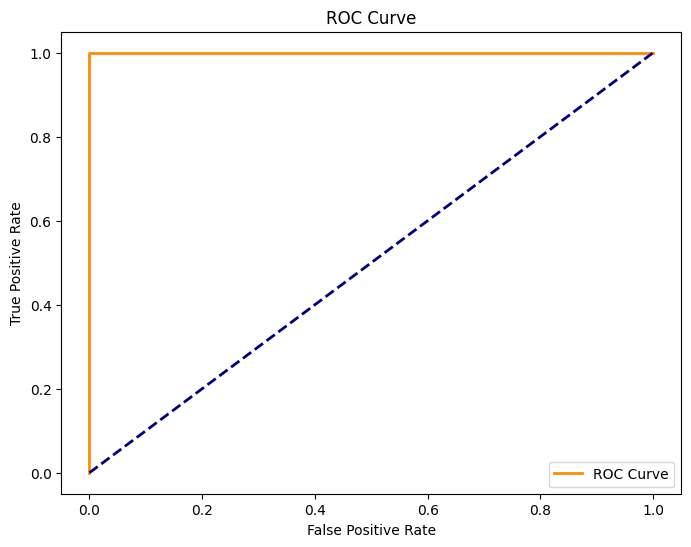

In [46]:
# Plot ROC Curve -- gives perfect score.

# ROC AUC Score -- visualizes trade-offs between sensitivity (recall) and specificity (true negative rate)
roc_auc = roc_auc_score(y_test, predictions)
print("ROC AUC Score:", roc_auc)

y_proba = model.predict_proba(X_test)[:, 1]

fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC Curve')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

With lasso feature selection, the logistic regression model performs perfectly when classifying a Fire or Not_Fire. To incorporate the results of the first hypothesis, logistic regression is performed a third time to compare how the model performs when BUI replaces DMC and DC as an independent variable.

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        11
           1       1.00      0.94      0.97        17

    accuracy                           0.96        28
   macro avg       0.96      0.97      0.96        28
weighted avg       0.97      0.96      0.96        28

ROC AUC Score: 0.9705882352941176


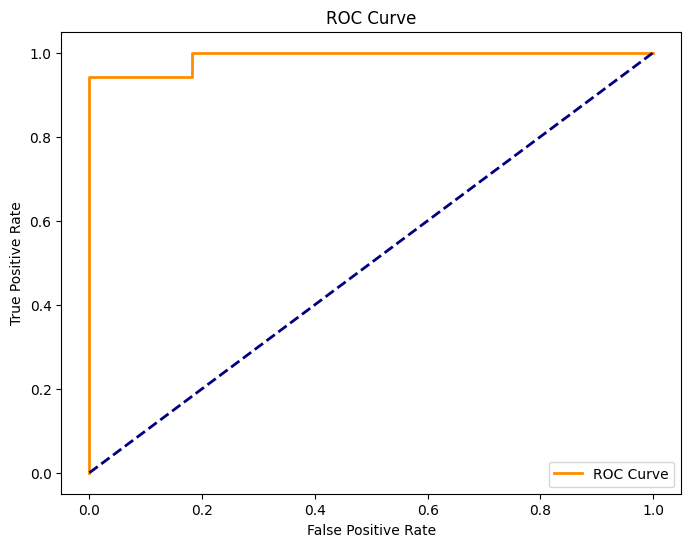

In [47]:
X_random_test = df.drop(columns={'month', 'Rain', 'Initial Spread Index', 'Drought Code', 'Duff MC', 'Fire','Not_Fire'}, axis=1)
#pick column Fire or Not_Fire. Do not need to choose both because they display same data
#just make sure you know which class 1 and 0 correspond to for the column you choose.
y_random_test = df['Fire']

X_train, X_test, y_train, y_test = train_test_split(X_random_test, y_random_test, test_size=0.3)

model = LogisticRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)
print(classification_report(y_test, predictions))

# Plot ROC Curve -- gives perfect score.

# ROC AUC Score -- visualizes trade-offs between sensitivity (recall) and specificity (true negative rate)
roc_auc = roc_auc_score(y_test, predictions)
print("ROC AUC Score:", roc_auc)

y_proba = model.predict_proba(X_test)[:, 1]

fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC Curve')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


## Conclusion

The objectives of this project are met using multiple linear regression, logistic regression, and both L1 and L2 regularization techniques. Buildup index has a strong linear correlation with its predictor variables duff MC and drought code. Additionally, the binary classification of whether a fire occurs or not is dependent on a select few factors as opposed to every feature presented in the dataset. The most important factors for this classification are temperature, relative humidity, wind speed, fine fuel MC, duff MC, drought code, and fire weather index. The Bejaia Region dataset, taken as a subset of the Algerian Forest Fires dataset, accurately performs regression and classification tasks and provides valuable insights into predictions of these natural disasters. This study is limited to one region of Algeria, so cannot be accurately generalized to predict forest fires in other parts of the world. This may be reexamined in the future by compiling data from geographically diverse areas and seeing if the established relationships hold.

## References

[1] Yoonsung Jung, “Lecture 28-Regression02-Multiple 	Linear.”

[2] Yoonsung Jung, “Lecture 30-Regression04-Lasso.”

[3] Yoonsung Jung, “Lecture 31-Regression05-Ridge.”

[4] Yoonsung Jung, “Lecture 33-Regression07-Logistic 	Regression.”
